In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import make_scorer, recall_score
from sklearn.neural_network import MLPClassifier

# Load the dataset
fetal_health_df = pd.read_csv('fetal_health.csv')

# Display the first few rows of the dataset
print(fetal_health_df.head())

# Check for missing values
missing_values = fetal_health_df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Define the numerical columns (all columns except 'fetal_health')
numerical_features = fetal_health_df.columns.difference(['fetal_health']).tolist()

# Define the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features)
    ])

# Separate features and target
X = fetal_health_df.drop('fetal_health', axis=1)
y = fetal_health_df['fetal_health']

# Apply the preprocessing pipeline to the features
X_preprocessed = preprocessor.fit_transform(X)

# Check the class distribution of the target variable
class_distribution = y.value_counts(normalize=True) * 100
print("Class distribution (%):\n", class_distribution)

# Split the data into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42, stratify=y)


   baseline value  accelerations  fetal_movement  uterine_contractions  \
0             132          0.006             0.0                 0.006   
1             133          0.003             0.0                 0.008   
2             134          0.003             0.0                 0.008   
3             132          0.007             0.0                 0.008   
4             134          0.001             0.0                 0.010   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.003                   0.0                     0.000   
1                0.003                   0.0                     0.000   
2                0.003                   0.0                     0.000   
3                0.000                   0.0                     0.000   
4                0.009                   0.0                     0.002   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                               17

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
from sklearn.metrics import make_scorer, recall_score

# Define the parameter range for alpha
alpha_range = np.logspace(-3, 1, 30)

# Create a scorer for Recall
recall_scorer = make_scorer(recall_score, average='weighted')

# Validation curve for alpha
train_scores, valid_scores = validation_curve(
    MLPClassifier(solver='sgd', max_iter=2500, learning_rate='constant', hidden_layer_sizes=(100, 50), activation='relu', random_state=42),
    X_train, y_train,
    param_name='alpha',
    param_range=alpha_range,
    cv=5,
    scoring=recall_scorer,
    n_jobs=-1
)

# Calculate mean and standard deviation for training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# Plot the validation curve
plt.figure(figsize=(10, 6))
plt.plot(alpha_range, train_mean, label='Training score', color='blue')
plt.plot(alpha_range, valid_mean, label='Cross-validation score', color='green')
plt.fill_between(alpha_range, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.fill_between(alpha_range, valid_mean - valid_std, valid_mean + valid_std, alpha=0.2, color='green')
plt.xscale('log')
plt.title('Validation Curve for MLPClassifier (alpha)')
plt.xlabel('Alpha')
plt.ylabel('Recall Score')
plt.legend(loc='best')
plt.grid(True)
plt.show()


Iteration 1, loss = 1.07751010
Iteration 2, loss = 1.00905011
Iteration 3, loss = 0.91837724
Iteration 4, loss = 0.82660543
Iteration 5, loss = 0.74206471
Iteration 6, loss = 0.67034712
Iteration 7, loss = 0.60902833
Iteration 8, loss = 0.55935622
Iteration 9, loss = 0.51759295
Iteration 1, loss = 0.69421570
Iteration 10, loss = 0.48330039
Iteration 11, loss = 0.45374023
Iteration 12, loss = 0.42876468
Iteration 2, loss = 0.66197493
Iteration 13, loss = 0.40761606
Iteration 3, loss = 0.62001671
Iteration 14, loss = 0.38894909
Iteration 1, loss = 0.69510285
Iteration 15, loss = 0.37288236
Iteration 4, loss = 0.57670824
Iteration 16, loss = 0.35812439
Iteration 17, loss = 0.34540290
Iteration 5, loss = 0.53656689
Iteration 2, loss = 0.65974571
Iteration 18, loss = 0.33369889
Iteration 6, loss = 0.50101753
Iteration 19, loss = 0.32302970
Iteration 20, loss = 0.31325803
Iteration 3, loss = 0.61423391
Iteration 7, loss = 0.47066013
Iteration 1, loss = 0.71258382
Iteration 21, loss = 0.30468

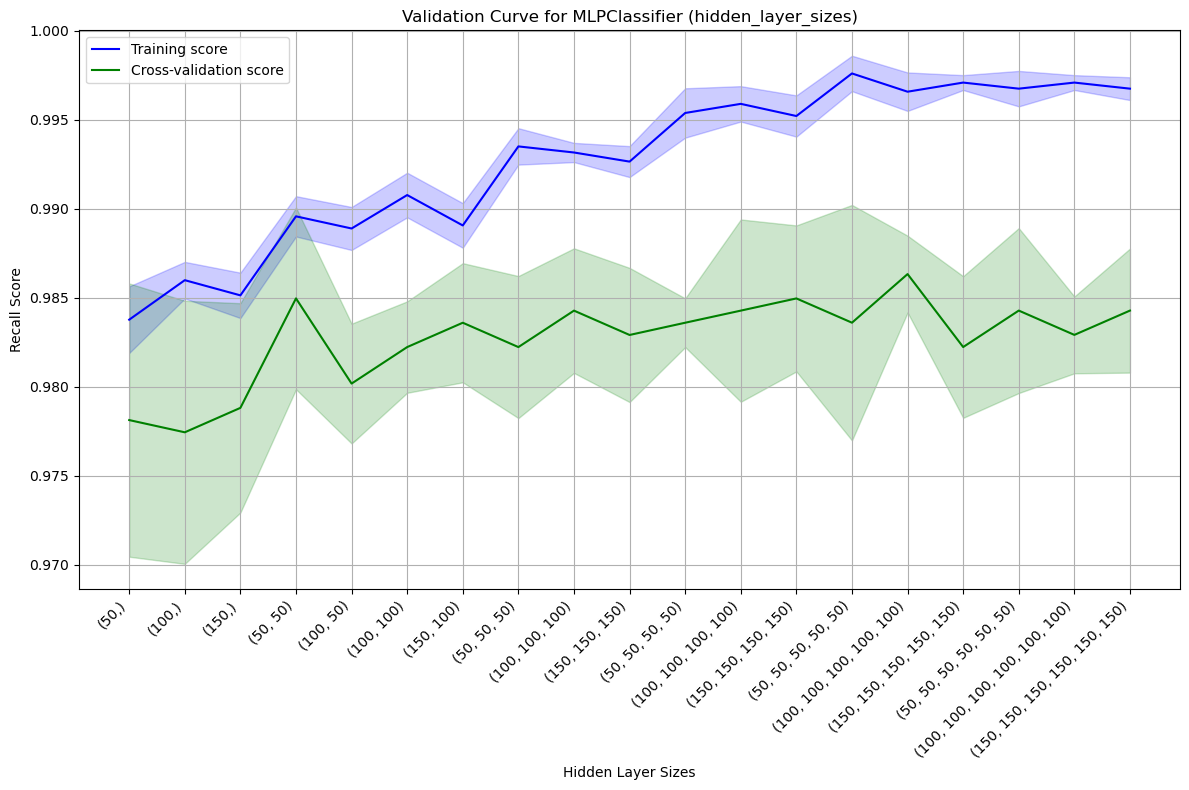

In [33]:
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
from sklearn.metrics import make_scorer, recall_score
from sklearn.neural_network import MLPClassifier

# Define the parameter range for hidden_layer_sizes
hidden_layer_sizes_range = [
    (50,), (100,), (150,), 
    (50, 50), (100, 50), (100, 100), (150, 100), 
    (50, 50, 50), (100, 100, 100), (150, 150, 150), 
    (50, 50, 50, 50), (100, 100, 100, 100), (150, 150, 150, 150), 
    (50, 50, 50, 50, 50), (100, 100, 100, 100, 100), (150, 150, 150, 150, 150),
    (50, 50, 50, 50, 50, 50), (100, 100, 100, 100, 100, 100), (150, 150, 150, 150, 150, 150)
]
hidden_layer_sizes_labels = [str(hls) for hls in hidden_layer_sizes_range]

# Create a scorer for Recall
recall_scorer = make_scorer(recall_score, average='weighted')

# Validation curve for hidden_layer_sizes
train_scores, valid_scores = validation_curve(
    MLPClassifier(solver='sgd', max_iter=3000, learning_rate='constant', alpha=0.1, activation='relu', random_state=42, verbose=True),
    X_train, y_train,
    param_name='hidden_layer_sizes',
    param_range=hidden_layer_sizes_range,
    cv=5,
    scoring=recall_scorer,
    n_jobs=-1
)

# Calculate mean and standard deviation for training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# Plot the validation curve
plt.figure(figsize=(12, 8))
plt.plot(range(len(hidden_layer_sizes_range)), train_mean, label='Training score', color='blue')
plt.plot(range(len(hidden_layer_sizes_range)), valid_mean, label='Cross-validation score', color='green')
plt.fill_between(range(len(hidden_layer_sizes_range)), train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.fill_between(range(len(hidden_layer_sizes_range)), valid_mean - valid_std, valid_mean + valid_std, alpha=0.2, color='green')
plt.xticks(range(len(hidden_layer_sizes_labels)), hidden_layer_sizes_labels, rotation=45, ha='right')
plt.title('Validation Curve for MLPClassifier (hidden_layer_sizes)')
plt.xlabel('Hidden Layer Sizes')
plt.ylabel('Recall Score')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
from sklearn.metrics import make_scorer, recall_score
from sklearn.neural_network import MLPClassifier

# Define the parameter range for activation functions
activation_range = ['logistic', 'tanh', 'relu']

# Create a scorer for Recall
recall_scorer = make_scorer(recall_score, average='weighted')

# Validation curve for activation functions
train_scores, valid_scores = validation_curve(
    MLPClassifier(solver='sgd', max_iter=3000, learning_rate='constant', alpha=0.1, hidden_layer_sizes=(50, 50), random_state=42, verbose=True),
    X_train, y_train,
    param_name='activation',
    param_range=activation_range,
    cv=5,
    scoring=recall_scorer,
    n_jobs=-1
)

# Calculate mean and standard deviation for training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# Plot the validation curve
plt.figure(figsize=(10, 6))
plt.plot(activation_range, train_mean, label='Training score', color='blue')
plt.plot(activation_range, valid_mean, label='Cross-validation score', color='green')
plt.fill_between(activation_range, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.fill_between(activation_range, valid_mean - valid_std, valid_mean + valid_std, alpha=0.2, color='green')
plt.title('Validation Curve for MLPClassifier (activation)')
plt.xlabel('Activation Function')
plt.ylabel('Recall Score')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


NameError: name 'X_train' is not defined

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import recall_score, make_scorer
import matplotlib.pyplot as plt
import numpy as np

# Define the model with the tuned hyperparameters
mlp = MLPClassifier(solver='sgd', max_iter=1, learning_rate='constant', alpha=0.1,
                    hidden_layer_sizes=(50, 50), activation='relu', warm_start=True, random_state=42)

# Initialize lists to store scores
train_scores = []
cv_scores = []

# Define the number of epochs
epochs = np.arange(1, 51)  # Reduced the number of epochs to 50

# Cross-validation setup
cv = StratifiedKFold(n_splits=3)  # Reduced the number of folds to 3

# Create a scorer for Recall
recall_scorer = make_scorer(recall_score, average='weighted')

# Loop over the number of epochs
for epoch in epochs:
    mlp.max_iter = epoch  # Set the current number of epochs
    mlp.fit(X_train, y_train)  # Fit the model on the training data
    
    # Calculate training score
    train_score = recall_score(y_train, mlp.predict(X_train), average='weighted')
    train_scores.append(train_score)
    
    # Calculate cross-validation score
    cv_score = cross_val_score(mlp, X_train, y_train, cv=cv, scoring=recall_scorer, n_jobs=-1).mean()
    cv_scores.append(cv_score)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_scores, label='Training score', color='blue')
plt.plot(epochs, cv_scores, label='Cross-validation score', color='green')
plt.xlabel('Epochs')
plt.ylabel('Recall Score')
plt.title('Learning Curve for MLPClassifier (Recall Score)')
plt.legend(loc='best')
plt.grid(True)
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilay

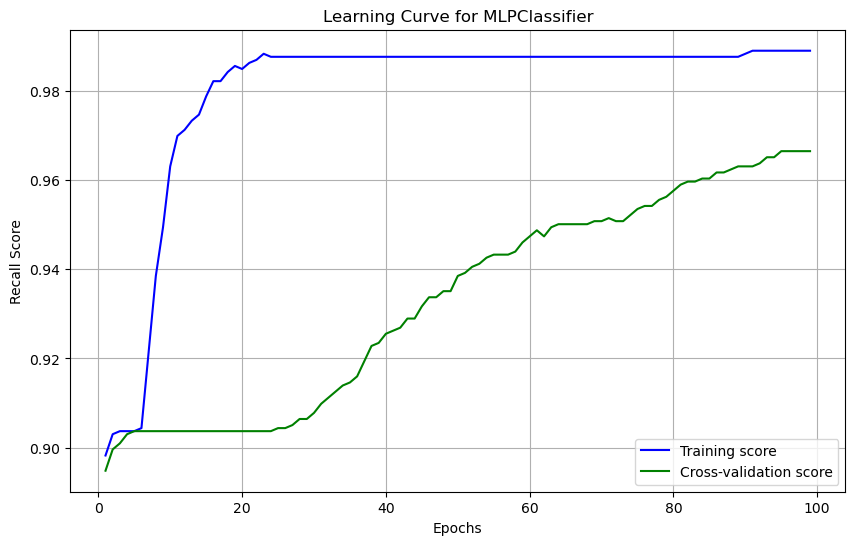

In [9]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import recall_score, make_scorer

# Define the model with the tuned hyperparameters
mlp = MLPClassifier(solver='sgd', max_iter=1, learning_rate='constant', alpha=0.1,
                    hidden_layer_sizes=(100, 50), activation='relu', warm_start=True, random_state=42)

# Initialize lists to store scores
train_scores = []
cv_scores = []

# Define the number of epochs
epochs = np.arange(1, 100)

# Cross-validation setup
cv = StratifiedKFold(n_splits=3)

# Loop over the number of epochs
for epoch in epochs:
    mlp.max_iter = epoch  # Set the current number of epochs
    mlp.fit(X_train, y_train)  # Fit the model on the training data
    
    # Calculate training score
    train_score = recall_score(y_train, mlp.predict(X_train), average='weighted')
    train_scores.append(train_score)
    
    # Calculate cross-validation score
    cv_score = cross_val_score(mlp, X_train, y_train, cv=cv, scoring=recall_scorer).mean()
    cv_scores.append(cv_score)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_scores, label='Training score', color='blue')
plt.plot(epochs, cv_scores, label='Cross-validation score', color='green')
plt.xlabel('Epochs')
plt.ylabel('Recall Score')
plt.title('Learning Curve for MLPClassifier')
plt.legend(loc='best')
plt.grid(True)
plt.show()

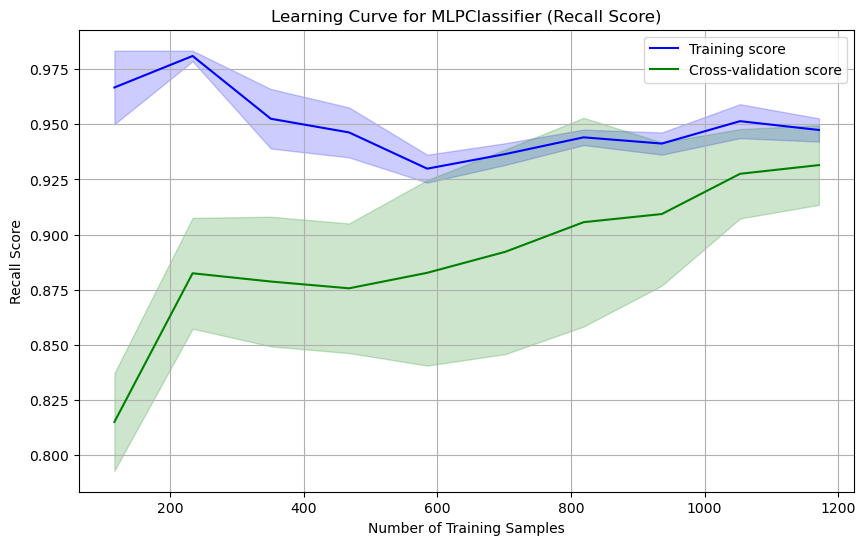

In [38]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer, recall_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neural_network import MLPClassifier

# Define the model with the tuned hyperparameters
mlp = MLPClassifier(solver='sgd', max_iter=2000, learning_rate='constant', alpha=0.1,
                    hidden_layer_sizes=(50, 50), activation='relu', random_state=42)

# Create a scorer for Recall
recall_scorer = make_scorer(recall_score, average='macro')
# Calculate learning curve
train_sizes, train_scores, valid_scores = learning_curve(
    mlp, X_train, y_train, cv=5, scoring=recall_scorer,
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

# Calculate mean and standard deviation for training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score', color='blue')
plt.plot(train_sizes, valid_mean, label='Cross-validation score', color='green')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, alpha=0.2, color='green')
plt.xlabel('Number of Training Samples')
plt.ylabel('Recall Score')
plt.title('Learning Curve for MLPClassifier (Recall Score)')
plt.legend(loc='best')
plt.grid(True)
plt.show()


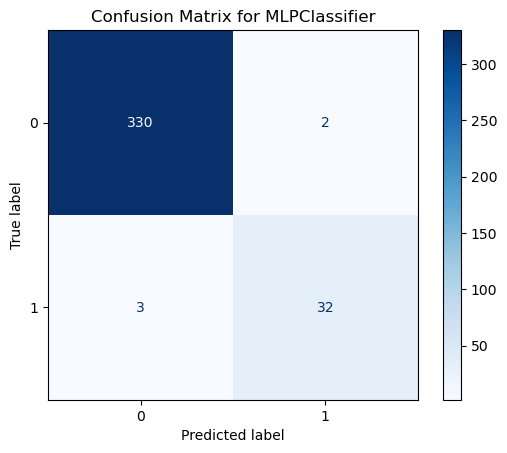

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define the model with the tuned hyperparameters
mlp = MLPClassifier(solver='sgd', max_iter=3000, learning_rate='constant', alpha=0.1,
                    hidden_layer_sizes=(50, 50), activation='relu', random_state=42)

# Train the model on the training data
mlp.fit(X_train, y_train)

# Make predictions on the validation data
y_pred = mlp.predict(X_val)

# Calculate the confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for MLPClassifier')
plt.show()
